# Estadistica Aplicada   Grupo: 043

## Nombre: Alan Fernando Del Real Almaguer   Matrícula: 1918760

**TAREA 5 "Análisis de supervivencia en python"**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [31]:
datex= pd.read_excel("C:/Users/alan0/Downloads/ACTS EST APLICADA/supervivencia_examenes.xlsx")
datex

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


**17 alumnos que presentaron el examen de estadística aplicada el año
pasado a los cuales se les dio 2hrs (120 minutos) para contestar el examen**

Las variables son las siguientes: 

**id** es un identificador de alumno

**tiempo** es el tiempo medido en minutos que tardaron en contestar el examen 

**examen** toma el valor de 1 si entrego el examen y 0 sino lo entrego 

**calificación** es la calificación recibida en el examen

**género** es m:masculino y f:femenino

**a) Estadísticas descriptivas. Calcule el tiempo promedio que tardaron en
responder los alumnos el examen y la calificación promedio obtenida.
El profesor sospecha que las alumnas responden más rápido el examen,
calcule el tiempo promedio que tardaron en responder las alumnas y su
calificación promedio, asi como el tiempo promedio que tardaron en
responder los alumnos y su calificación promedio**

In [17]:
datex.describe()

,id,tiempo,examen,calificación
count,17.000000,17.000000,17.0,17.000000
mean,9.000000,107.352941,1.0,90.705882
std,5.049752,11.241337,0.0,9.642126
min,1.000000,85.000000,1.0,72.000000
25%,5.000000,103.000000,1.0,84.000000
50%,9.000000,109.000000,1.0,96.000000
75%,13.000000,116.000000,1.0,98.000000
max,17.000000,120.000000,1.0,100.000000


Los alumnos, refiriendonos al grupo entero, tardaron un tiempor promedio de 107.35 min en responder el examen, del mismo modo, en la calificacion como promedio se obtuvo que el grupo tiene una calif de 90.71.

In [93]:
dat_alumnas = datex.query("género == 'f'")
dat_alumnas

,id,tiempo,examen,calificación,género
3,4,120,1,100.0,f
4,5,106,1,98.0,f
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f
11,12,99,1,86.0,f
14,15,90,1,78.0,f


In [94]:
dat_alumnas.describe()

,id,tiempo,examen,calificación
count,8.000000,8.000000,8.0,8.000000
mean,8.750000,108.125000,1.0,93.000000
std,3.615443,10.162079,0.0,7.329003
min,4.000000,90.000000,1.0,78.000000
25%,6.500000,104.250000,1.0,92.000000
50%,8.500000,108.000000,1.0,96.000000
75%,10.500000,116.000000,1.0,96.500000
max,15.000000,120.000000,1.0,100.000000


Los alumnas tardaron un tiempor promedio de 108.12 min en responder el examen, del mismo modo, en la calificacion como promedio se obtuvo que se tiene una calif de 93.

In [29]:
dat_alumnos = datex.query("género == 'm'")
dat_alumnos

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
5,6,103,1,98.0,m
10,11,87,1,88.0,m
12,13,112,1,84.0,m
13,14,111,1,82.0,m
15,16,116,1,74.0,m
16,17,119,1,72.0,m


In [30]:
dat_alumnos.describe()

,id,tiempo,examen,calificación
count,9.000000,9.000000,9.0,9.000000
mean,9.222222,106.666667,1.0,88.666667
std,6.280481,12.698425,0.0,11.357817
min,1.000000,85.000000,1.0,72.000000
25%,3.000000,103.000000,1.0,82.000000
50%,11.000000,111.000000,1.0,88.000000
75%,14.000000,116.000000,1.0,100.000000
max,17.000000,119.000000,1.0,100.000000


Los alumnos, refiriendonos al alumnado varonil, tardaron un tiempor promedio de 106.67 min en responder el examen, del mismo modo, en la calificacion como promedio se obtuvo que se tiene una calif de 88.67 aprox

**b)¿Cómo crees que se comporta el riesgo de entregar el examen conforme transcurre el tiempo? ¿es constante, creciente, o decreciente? Según tu respuesta ajusta un modelo exponencial o Weibull, primero para todos los individuos y muestra la función de riesgo.**

In [ ]:
Mientras mas avance el tiempo, se tiende a incrementar el riesgo de entregar el examen, es decir, dicho riesgo, es creciente

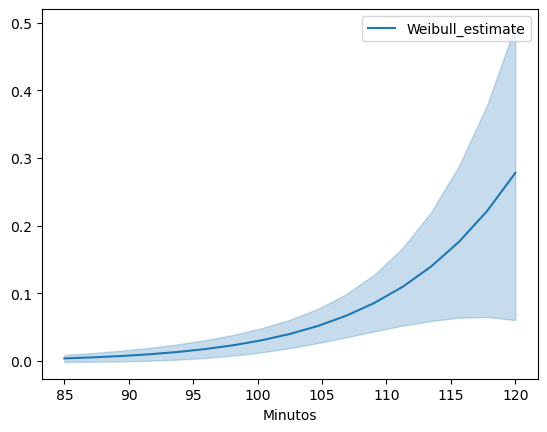

In [46]:
weib_gpo = WeibullFitter().fit(datex["tiempo"], datex["examen"])
weib_gpo.plot_hazard()
plt.xlabel("Minutos")
plt.show()

**c) Ahora estima el mismo modelo que planteaste en el inciso anterior, pero para
hombres y mujeres, y grafica ambas funciones de supervivencia juntas
(empalmadas), ¿gráficamente quien tarda más en entregar el examen?**


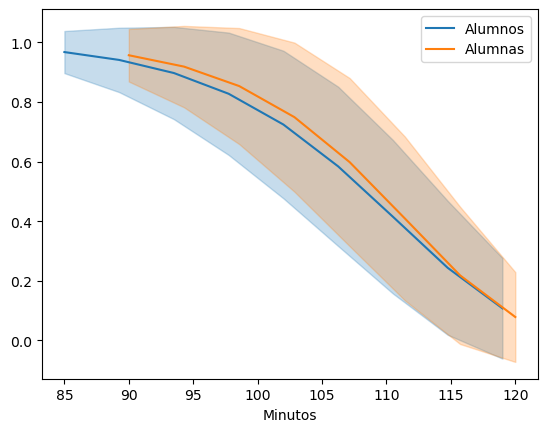

In [67]:
weibh = WeibullFitter().fit(dat_alumnos["tiempo"], dat_alumnos["examen"])
weibf = WeibullFitter().fit(dat_alumnas["tiempo"], dat_alumnas["examen"])
weibh.plot_survival_function(label = "Alumnos")
weibf.plot_survival_function(label = "Alumnas")
plt.xlabel("Minutos")
plt.show()

Tomando el grafico como punto de referencia, notese que las alumnas tardaron mas en entregar el examen, en contraste con los alumnos (hombres).

**d) Estime la función de supervivencia del tiempo de entrega del examen de
todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función
de supervivencia, los valores del intervalos de confianza al 95%, asi como la
gráfica respectiva de la función de supervivencia con sus intervalos.**

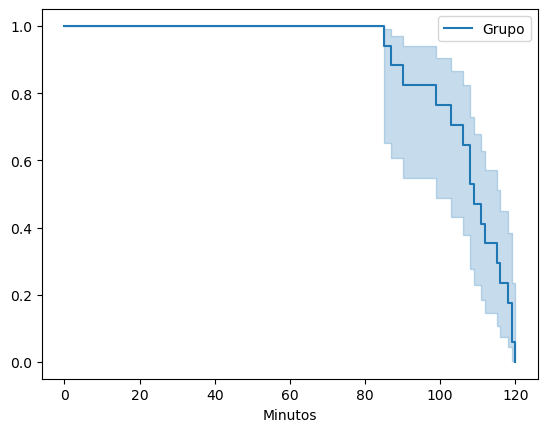

In [58]:
km_gpo = KaplanMeierFitter().fit(datex["tiempo"], datex["examen"])
km_gpo.plot_survival_function(label = "Grupo")
plt.xlabel("Minutos")
plt.show()

In [60]:
km_gpo.survival_function_
# Valores de la funcion

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


In [62]:
kmgpo.confidence_interval_survival_function_
# Valores intervalo al 95%

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


**e) Realice un gráfico donde muestre la función de supervivencia de KaplanMeier de los alumnos (m) y de las alumnas (f) con sus respectivos intervalos
de confianza. Y comente con base en la gráfica si es posible que el profesor
tenga razón respecto a que las alumnas responden más rápido el examen**

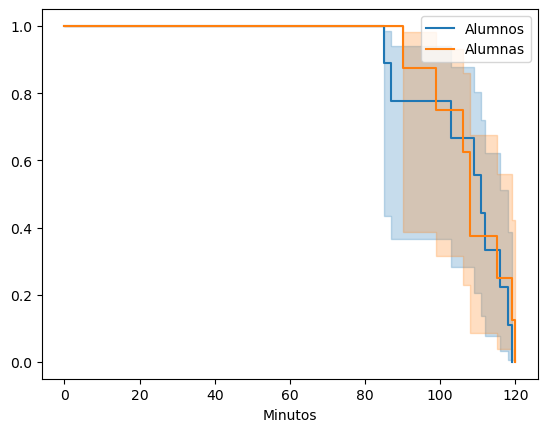

In [69]:
km_h = KaplanMeierFitter().fit(dat_alumnos["tiempo"], dat_alumnos["examen"])
km_f = KaplanMeierFitter().fit(dat_alumnas["tiempo"], dat_alumnas["examen"])
km_h.plot_survival_function(label = "Alumnos")
km_f.plot_survival_function(label = "Alumnas")
plt.xlabel("Minutos")
plt.show()

Los alumnos, segun lo observado en el grafico, son quienes respondieron mas rapido el examen, en otras palabras, podriamos afirmar que el profesor no tiene la razon.

**f) Realice el log rank test para probar si las funciones de supervivencia de
alumnos y alumnas para responder el examen son iguales. Comente el
resultado de la prueba de hipótesis y diga si el profesor tiene razón o no**

Planteamos las hipotesis:

**Ho:** funciones de supervivencia de ambos examenes son iguales

**Ha:** funciones de supervivencia de ambos examenes no son iguales

In [74]:
lrt=logrank_test(dat_alumnas["tiempo"],dat_alumnos["tiempo"],dat_alumnas["examen"],dat_alumnos["examen"])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

Observando que nuestro p valor es igual a 0.69, logicamente deducimos que nuestro p valor no es inferior en valor respecto al alpha, 0.69 y 0.05, respectivamente. Por lo tanto se concluye que son iguales las funciones de supervivencia de alumnas y alumnos.

**g) El profesor tambien sospecha que quienes entregan el examen más rápido es
porque no estudiaron, por tanto no saben que responder y entregan el
examen casi inmediatamente.
Estime un modelo de cox de riesgos proporcionales donde utilice como
variables explicativas el género y la calificación obtenida, para explicar la
función de riesgo de entregar el examen.**

In [78]:
datoscox = datex.copy()
datoscox["género"]= datoscox["género"].map({"m":0,"f":1})

In [81]:
cph = CoxPHFitter().fit(datoscox, "tiempo","examen")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-21 02:28:05 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género        -0.50       0.60       0.80            -2.08             1.07                 0.13                 2.91

               cmp to     z    p   -log2(p)
covariate                                  
id               0.00  0.42 0.67       0.57
calificación     0.00  0.47 0.64       0.64
género           0.00 -0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

**h) Interprete los coeficientes de género y calificación obtenidos por el modelo
de cox, recuerde señalar: 1) si el coeficiente es significativo (se rechaza Ho),
en caso de ser significativo señala si aumentan el riesgo de entregar el
examen, y el tamaño del efecto. Recuerde añadir cph.plot() para ayudarse con
la interpretación**

<AxesSubplot:xlabel='log(HR) (95% CI)'>

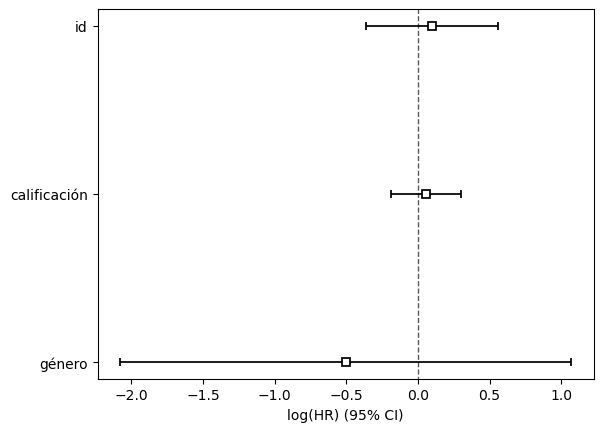

In [82]:
cph.plot()

**Prueba de Hipotesis**

**Ho**: Bi = 0

**Ha**: Bi ≠ 0

Teniendo que los p-value de las variables "calificacion" y "genero", son igual a 0.64 y 0.53, entonces se interpeta que como en ninguno de los dos casos alpha es menor a dichos valores antes mencionados, entonces, NO rechazamos Ho, concluyendo asi que los coeficientes de ambas variables, tienen un valor de 0, dejando sin aporte alguno al modelo.

**i) Utilice cph.plot_partial_effects_on_outcome(covariates='variable',
values=[0,1]) para estimar las funciones de supervivencia de alumnos y
alumnas de acuerdo con el modelo de cox ¿obtiene resultados similares al
inciso d, es decir, coincide con las funciones de supervivencia de KaplanMeier?**


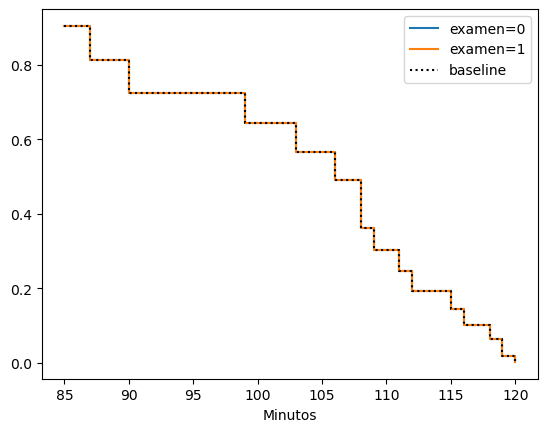

In [88]:
cph.plot_partial_effects_on_outcome(covariates="examen", values=[0,1])
plt.xlabel("Minutos")
plt.show()

El inciso d, si es similar a este.

**j) Por último, con base en la interpretación del modelo de cox y la significancia
de los coeficientes, comente si el profesor tiene razón al señalar que las
alumnas responden en menor tiempo el examen, y si el profesor tambien
tiene razón al señalar que los que entregan el examen rápido no estudiaron y
por tanto obtienen menores calificación**

Tomando en cuenta el signo del coeficiente de cada variable, entonces hacemos lo siguiente:

**Variable de calificion (positivo):** exp(coef) - 1 = exp(0.06) - 1 = 0.6284

**Variable de genero (negativo):** 1 - exp(coef) = 1 - exp(-0.50) = 0.3935

El profesor se equivoca al señalar que las alumnas responeden en menor tiempo el examen, ese titulo le corresponde a los alumnos.

El profesor no se equivoca al señalar que quienes entregan el examen mas rapido, obtienen como resultado una calificacion menor, esto respaldado por el hecho de qie los alumnos hombres tienen un menor promedio de calificacion, simultaneamente, tambien son quienes tienen un promedio de tiempo de entrega menor que el de las alumnas.